# Import required libraries and modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("C:\\Users\\abhishek ambawale\\Downloads\\delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df=df.rename({"Delivery Time" : "delivery_time","Sorting Time" : "sorting_time"},axis=1)

In [4]:
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


C:\Users\abhishek ambawale\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


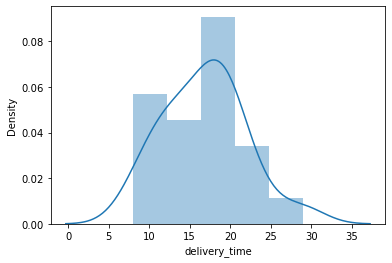

In [5]:
sns.distplot(df['delivery_time'])
plt.show()

C:\Users\abhishek ambawale\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


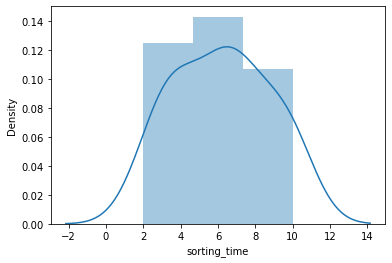

In [6]:
sns.distplot(df['sorting_time'])
plt.show()

Text(0, 0.5, 'Delivery Time')

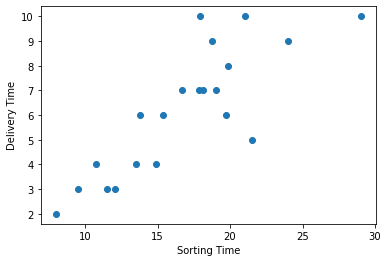

In [7]:
plt.scatter(df.delivery_time,df.sorting_time)
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

In [8]:
x = df.iloc[:,1]
x

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: sorting_time, dtype: int64

In [9]:
y = df.iloc[:,0]
y

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: delivery_time, dtype: float64

## Train test split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=42)

In [11]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train.values.reshape(-1,1))
x_test = scaler.transform(x_test.values.reshape(-1,1))

## Visualize Training data and Testing data

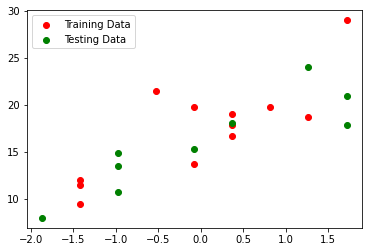

In [12]:
plt.scatter(x_train,y_train,label="Training Data",color='r')
plt.scatter(x_test,y_test,label="Testing Data",color='g')
plt.legend()

## Create linear model

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

## Use model to predict on TEST data

In [15]:
prediction = lr.predict(x_test)

## Plot prediction line against actual test data

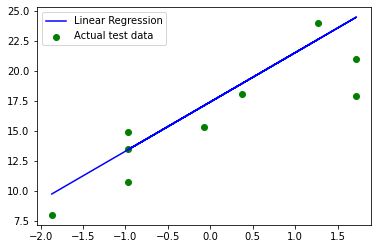

In [16]:
plt.plot(x_test,prediction,label="Linear Regression", color='b')
plt.scatter(x_test,y_test,label="Actual test data",color='g')
plt.legend()

In [17]:
lr.predict(np.array([[10]]))[0]

58.52687669194103

In [18]:
x_test

array([[ 1.71910071],
       [ 0.37371755],
       [-0.97166562],
       [-0.97166562],
       [ 1.71910071],
       [-0.07474351],
       [-0.97166562],
       [ 1.27063966],
       [-1.86858773]])

In [19]:
y_test

0     21.00
17    18.11
15    14.88
1     13.50
8     17.90
5     15.35
11    10.75
3     24.00
18     8.00
Name: delivery_time, dtype: float64

# Finding r2 score of model.

In [20]:
r2_score = r2_score(y_test,prediction)

In [21]:
r2_score

0.6250610794583465